# SYD DAT 4 Lab 2 - Visualisation and Regression

##Homework - Due 4th/6th May 2016

#### Communication
Pick one data science topic that interests you, could be an article, or how a Kaggle competition was won, or an article incorporating data journalism. Write a 5 minute presentation with 5 slides. You should explain, what was done, the motivation behind it, the results and what you can think of that would improve the project.

We will present these in class on Wednesday 4th May to practice presentation skills.

Direct message me over Slack with the slides on Tuesday 3rd May so I can put the class slides together.

#### Course Project
Share with a me a ipython notebook containing the following:
* Data read into python in a data frame
* A statistical summary of your data
* A visualisation of your data
* One of the following with your data; Linear or Logistic Regression (with regularization), or Clustering.
* A written summary at the end describing your data

**Instructions: Send me the slides on Tuesday 3rd May and have the notebook in your project repository by 6th May**

# Homework 3: Visualisation and Regression

In [1]:
# Setup Libraries
# %matplotlib inline
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# import the training data
training = pd.read_csv('cs-training.csv',index_col= 'idx' )

# view the data
training.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents
idx,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


In [3]:
# Statisitical Summary of the data
training.describe(include='all')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,120269.000000,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6670.221237,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,14384.674215,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8249.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3008750.000000,58.000000,98.000000,54.000000,98.000000,20.000000


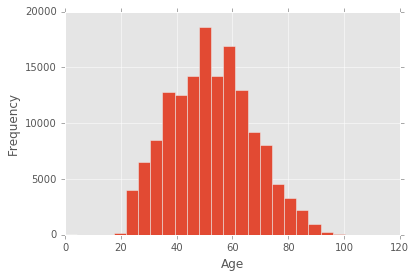

In [4]:
# Univariate analysis of the data
training.age.hist(bins=25)
plt.xlabel('Age') 
plt.ylabel('Frequency')

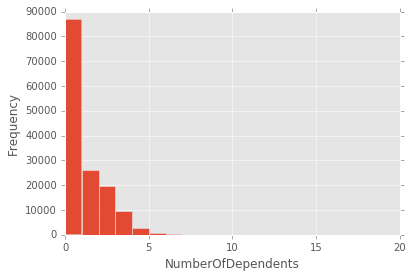

In [5]:
training.NumberOfDependents.hist(bins=20)
plt.xlabel('NumberOfDependents') 
plt.ylabel('Frequency')

In [6]:
above7 = training[training.NumberOfDependents > 7]
above7.NumberOfDependents.shape

(36L,)

There are some interesting things to note about the data. There will need to do quite a bit of cleaning in order to be able to produce useful predictions. 

Some points to note:
* The distribution of age is bell shaped. It is not normal given that people will be less likely to have loans very late in their life. The data would be right truncated also. A gamma distribution would be more likely

* The largest number of dependants is 20. The data is may have a number of outliers. When considering the distribution of dependants, one would consider anything above 6 or 7 to be extremely rare (questionably wrong in some instances). There are 36 out of the 150,000 rows that have a count of the number of dependants above 7.

* Where Monthly Income is missing, the debt ratio tends to be very large. There is some serious issues here were we may need to start working with a subset of the training data that does not contain missing values. From here we can try to first build some intuition around what the underlying signal may be and then start to consider was to incorporate the missing values and impute them in a meaningful way.

In [8]:
# Missing value counts
training.isnull().sum() 

SeriousDlqin2yrs                             0
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30to59DaysPastDueNotWorse        0
DebtRatio                                    0
MonthlyIncome                            29731
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60to89DaysPastDueNotWorse        0
NumberOfDependents                        3924
dtype: int64

In [9]:
# excluding the null values for income
train = training[training.MonthlyIncome.notnull()]

In [10]:
#re-check
train.isnull().sum()

SeriousDlqin2yrs                         0
RevolvingUtilizationOfUnsecuredLines     0
age                                      0
NumberOfTime30to59DaysPastDueNotWorse    0
DebtRatio                                0
MonthlyIncome                            0
NumberOfOpenCreditLinesAndLoans          0
NumberOfTimes90DaysLate                  0
NumberRealEstateLoansOrLines             0
NumberOfTime60to89DaysPastDueNotWorse    0
NumberOfDependents                       0
dtype: int64

In [11]:
# How much data is left
train.shape

(120269, 11)

So there is still quite a bit of data. Lets now for the moment consider a logistic regresssion model. The missing values will need quite a bit of work in order to come up with the best strategy. So for now we ignore them. Lets now fit a logistic regression model. This is prefered to out data given the nature of the problem. I.e its a classification problem.

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

In [13]:
X = train.iloc[:, 1:]
y = train.iloc[:, 0]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# Fitting a standard logistic regression model
logreg = LogisticRegression(C=1e9) #C is a cutoff for coefficients

feature_cols = list(X.columns.values)

logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

logreg.coef_

array([[ -7.60174766e-05,  -3.89918818e-02,   4.75167984e-01,
         -1.74018476e-04,  -4.79208453e-05,  -1.56426993e-02,
          3.63786286e-01,   1.10292258e-01,  -8.05023717e-01,
          2.65493594e-02]])

In [16]:
from sklearn import metrics
prds = logreg.predict(X)
print metrics.confusion_matrix(y, prds)

[[111712    200]
 [  8088    269]]


In [17]:
print "Accuracy =", float(111712+269)/float(111712+269 + 200 + 8088)
print "Sensitivity =", float(269)/float(269 + 8088)
print "Specificity =", float(111712)/float(111712 + 200)

Accuracy = 0.931087811489
Sensitivity = 0.0321885844202
Specificity = 0.99821288155


Given the poor results on Sensitivity of only 3.2%, this model is not very useful. We do not have too many features to begin with so regularisation has not taken place. 

Lets try logistic regression with with regularisation

In [18]:
logregL1 = LogisticRegression(penalty='l1',C=1e9)

feature_cols = list(X.columns.values)

logregL1.fit(X, y)
assorted_pred_classL1 = logregL1.predict(X)

prdsL1 = logregL1.predict(X)
print metrics.confusion_matrix(y, prdsL1)

[[111784    128]
 [  8213    144]]


In [19]:
logregL1.coef_

array([[ -6.12772879e-05,  -2.54480235e-02,   4.26363489e-01,
         -1.55029046e-04,  -4.31002294e-05,  -6.01400511e-03,
          2.24866768e-01,   8.10753206e-02,  -6.12887235e-01,
          1.09108258e-01]])

In [20]:
logregL2 = LogisticRegression(penalty='l2',C=1e9)

feature_cols = list(X.columns.values)

logregL2.fit(X, y)
assorted_pred_classL1 = logregL2.predict(X)

prdsL2 = logregL2.predict(X)
print metrics.confusion_matrix(y, prdsL2)

[[111712    200]
 [  8088    269]]


In [21]:
logregL2.coef_

array([[ -7.60174766e-05,  -3.89918818e-02,   4.75167984e-01,
         -1.74018476e-04,  -4.79208453e-05,  -1.56426993e-02,
          3.63786286e-01,   1.10292258e-01,  -8.05023717e-01,
          2.65493594e-02]])

### Summary
The regularisation (the logistic regression object supports either L1 or L2) resulted in a regligible difference in specificity. The L2 penalty made no difference in fact to the coefficient estimates. The L1 penalty penalty is not suitible. If we strength the level of regularisation, we begin to significantly degrade the estimation on the training data, suggesting that given we have only a small amount of variables to begin with, regularisation should not be used. 